# Predicting Gender by Liver Disease


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
file_path = 'Liver_diseases.csv'

In [3]:
data = pd.read_csv(file_path)

In [4]:
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data = data.rename(columns={'Dataset':'liver_disease'})

In [6]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [7]:
data['liver_disease'] = data['liver_disease'].map({2:0, 1:1})

In [8]:
data.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### Data Understanding
- Biliburin : Yellow pigment made during the breakdown of red blood cells. It increases by an increased destruction of red blood cells. A biliburin of over 1.2 is dangerous.
- Alkaline Phosphotase (ALP) : An enzyme in the blood that helps to break down proteins. Higher in males and increases at old age. Alp leve;s varies according to different organisations but a normal ALP level is from 30 to 147.
- Alamine Aminotransferase (ALT) : An enzyme found in the liver. When liver cells are damaged, they release ALT into the bloodstream. A normal ALT level is from 7 to 55.
- Aspartate Aminotransferase (AST) : Also released in the body when liver cells are damaged. A normal AST is 8 to 48.
- Proteins : Normal range is from 6 to 8g in the blood.
- Albumin : Albumin helps to move many small molecules through the blood. It's important to keep fluid in the blood from leaking into the tissues. Normal range is from 3.4 to 5.4g/dL
- Albumin and Globulin ratio (A/G) : Globulin helps to fight infection and move nutrients round the body. Normal A/G ratio is from 1.1 to 2.5. A low A/G is dangerous.

In [9]:
data = data.rename(columns={'Alkaline_Phosphotase':'ALP',
                            'Alamine_Aminotransferase': 'ALT',
                            'Aspartate_Aminotransferase': 'AST',
                            'Albumin_and_Globulin_Ratio': 'A/G_ratio'})

In [10]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total_Bilirubin   583 non-null    float64
 3   Direct_Bilirubin  583 non-null    float64
 4   ALP               583 non-null    int64  
 5   ALT               583 non-null    int64  
 6   AST               583 non-null    int64  
 7   Total_Protiens    583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A/G_ratio         579 non-null    float64
 10  liver_disease     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
data.isnull().sum()

Age                 0
Gender              0
Total_Bilirubin     0
Direct_Bilirubin    0
ALP                 0
ALT                 0
AST                 0
Total_Protiens      0
Albumin             0
A/G_ratio           4
liver_disease       0
dtype: int64

In [13]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


### What to do with outliers?

In [14]:
print('Maximum Bilirubin row:')
data[data.Total_Bilirubin == data.Total_Bilirubin.max()]


Maximum Bilirubin row:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1


In [15]:
print('Maximum ALP row:')
data[data.ALP == data.ALP.max()]

Maximum ALP row:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
233,33,Male,2.0,1.4,2110,48,89,6.2,3.0,0.9,1


In [16]:
print('Maximum ALT row:')
data[data.ALT == data.ALT.max()]

Maximum ALT row:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
117,32,Male,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1


In [17]:
print('Maximum AST row:')
data[data.AST == data.AST.max()]

Maximum AST row:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
135,66,Male,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1


### Replacing missing values of A/G ratio

In [18]:
data['A/G_ratio'].mode()


0    1.0
dtype: float64

In [19]:
data[data['A/G_ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [20]:
from sklearn.impute import SimpleImputer as SI

In [21]:
cols = data.columns

In [22]:
imputer = SI(strategy='most_frequent')
imputer.fit(data)

SimpleImputer(strategy='most_frequent')

In [23]:
new_data = imputer.transform(data)
data = pd.DataFrame(new_data, columns=cols)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               583 non-null    object
 1   Gender            583 non-null    object
 2   Total_Bilirubin   583 non-null    object
 3   Direct_Bilirubin  583 non-null    object
 4   ALP               583 non-null    object
 5   ALT               583 non-null    object
 6   AST               583 non-null    object
 7   Total_Protiens    583 non-null    object
 8   Albumin           583 non-null    object
 9   A/G_ratio         583 non-null    object
 10  liver_disease     583 non-null    object
dtypes: object(11)
memory usage: 50.2+ KB


### Seperating into independent and dependent variables

In [25]:
x = data[['Age', 'Total_Bilirubin','Direct_Bilirubin', 'ALP','ALT','AST','Total_Protiens', 'Albumin','A/G_ratio','liver_disease']]
x.head()

,Age,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
0,65,0.7,0.1,187,16,18,6.8,3.3,0.9,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.4,1


In [26]:
y = data['Gender']
y.head()

0    Female
1      Male
2      Male
3      Male
4      Male
Name: Gender, dtype: object

In [27]:
x = x.astype('float64')

<function matplotlib.pyplot.show(close=None, block=None)>

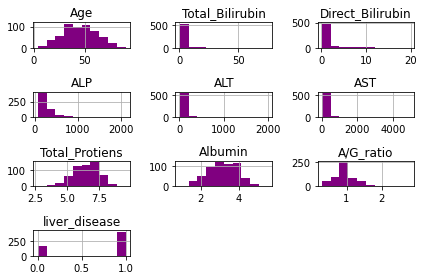

In [28]:
x.hist(color='purple')
plt.tight_layout()
plt.show()

In [29]:
x_corr = x.corr()

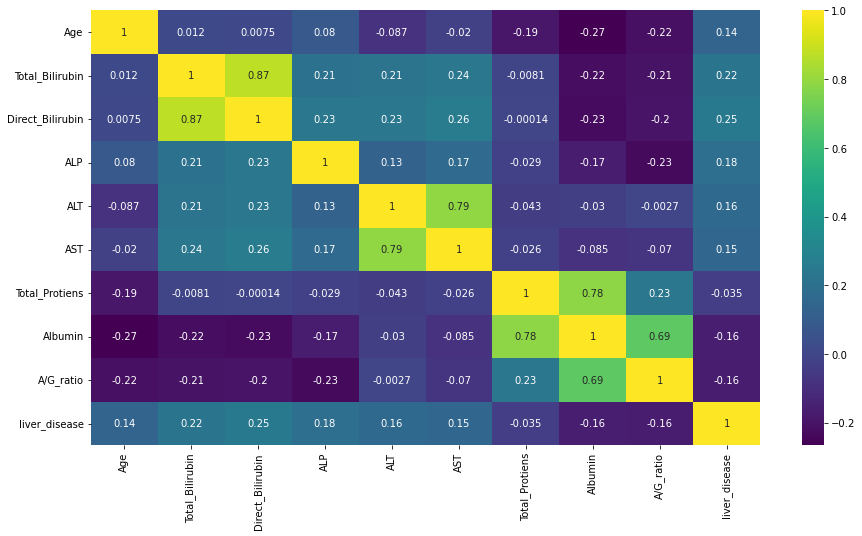

In [30]:
plt.figure(figsize = (15,8))
sb.heatmap(x_corr, cmap='viridis', annot=True)
plt.show()

### Correlation Analysis
- Total bilirubin and direct bilirubin are highly correlated
- AST and ALT are highy correlated
- Total protein and Albumin are highly correlated
- A/G and Albumin are highly correlated

### Dealing with imbalanced data...

In [31]:
!pip install imbalanced-learn

In [32]:
data.groupby(['liver_disease','Gender']).count()

Age  Total_Bilirubin  Direct_Bilirubin  ALP  ALT  AST  \
liver_disease Gender                                                          
0             Female   50               50                50   50   50   50   
              Male    117              117               117  117  117  117   
1             Female   92               92                92   92   92   92   
              Male    324              324               324  324  324  324   

                      Total_Protiens  Albumin  A/G_ratio  
liver_disease Gender                                      
0             Female              50       50         50  
              Male               117      117        117  
1             Female              92       92         92  
              Male               324      324        324

In [33]:
from collections import Counter

counter = Counter(y)
counter

Counter({'Female': 142, 'Male': 441})

In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [35]:
x

,Age,Total_Bilirubin,Direct_Bilirubin,ALP,ALT,AST,Total_Protiens,Albumin,A/G_ratio,liver_disease
0,65.000000,0.700000,0.100000,187.000000,16.000000,18.000000,6.800000,3.300000,0.900000,1.000000
1,62.000000,10.900000,5.500000,699.000000,64.000000,100.000000,7.500000,3.200000,0.740000,1.000000
2,62.000000,7.300000,4.100000,490.000000,60.000000,68.000000,7.000000,3.300000,0.890000,1.000000
3,58.000000,1.000000,0.400000,182.000000,14.000000,20.000000,6.800000,3.400000,1.000000,1.000000
4,72.000000,3.900000,2.000000,195.000000,27.000000,59.000000,7.300000,2.400000,0.400000,1.000000
...,...,...,...,...,...,...,...,...,...,...
877,50.720463,1.006456,0.372046,196.967722,27.473205,18.623629,7.309683,4.093544,1.293544,0.655907
878,36.864418,0.681074,0.100000,156.542328,80.347554,22.324846,6.891810,3.972884,1.324295,0.189264
879,30.267323,0.786679,0.200000,214.134108,14.800179,20.467144,7.500089,3.933393,1.086679,0.933393
880,59.689694,0.728162,0.128162,173.689694,24.183843,20.873537,6.587354,3.171838,0.900000,1.000000


In [36]:
new_counter = Counter(y)
new_counter

Counter({'Female': 441, 'Male': 441})

### Encoding the dependent variable

In [37]:
from sklearn.preprocessing import LabelEncoder as LE

In [38]:
encoder = LE()
y = encoder.fit_transform(y)

### Scaling the independent variables

In [39]:
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# x = normalizer.fit_transform(x)

In [40]:
#...................................................

In [41]:
from sklearn.preprocessing import StandardScaler as SC
col_names = x.columns
scaler = SC()
X_df= scaler.fit_transform(x)
x = pd.DataFrame(X_df, columns=col_names)

### Splitting into training and testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, stratify=y, random_state=1)

### Random Forest ...

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [45]:
classifier = RFC(random_state=1)

In [46]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [52]:
%%time
classifier.fit(x_train,y_train)

Wall time: 246 ms


RandomForestClassifier(random_state=1)

In [48]:
y_pred = classifier.predict(x_test)

### Evaluation

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[39,  5],
       [ 3, 42]], dtype=int64)

In [51]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.89      0.93      0.91        45

    accuracy                           0.91        89
   macro avg       0.91      0.91      0.91        89
weighted avg       0.91      0.91      0.91        89



In [53]:
!git init

Initialized empty Git repository in C:/Users/adeto/Documents/learn/.git/


In [54]:
!git commit -m ""

On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Liver disease.ipynb
	Liver_diseases.csv
	Multivariate analysis of liver diseases based on gender and age.twb
	~Multivariate analysis of liver diseases based on gender and age__15608.twbr

nothing added to commit but untracked files present (use "git add" to track)
